<a href="https://colab.research.google.com/github/RanjithAmirneni/Data-Science-Exercises/blob/main/01_V_IMP_GridSearch_HyperParamTuning_MultiAlgos_Noor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier,VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report, roc_auc_score

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/DataScience/07-GridSearch,PipeLine_RealtimeCodeWriting/heart.csv'

In [ ]:
data = pd.read_csv(path)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

**Today we are not going to concentrate much on the preprocessing as out aim and focus is on Gridsearch and hyperparameter tuning and pipeline.**

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.duplicated().sum()

1

In [ ]:
data= data.drop_duplicates()

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [ ]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


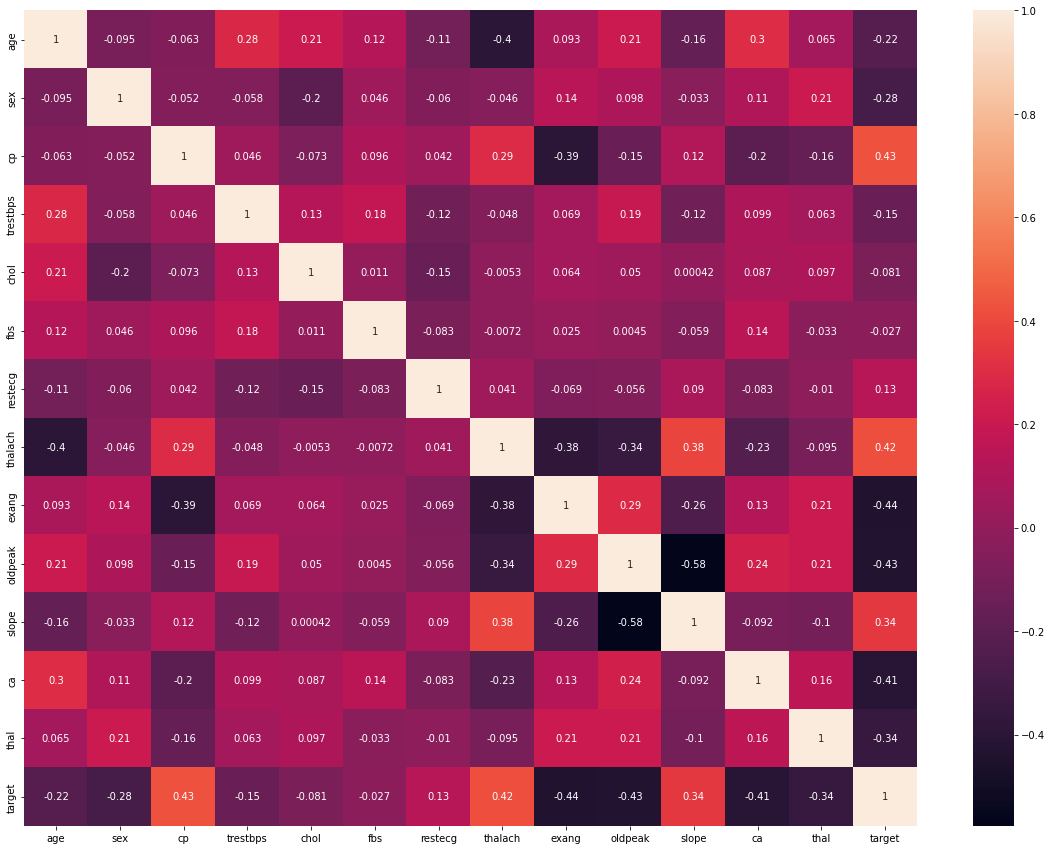

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.cp.value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

In [ ]:
data.groupby('target').cp.value_counts(normalize=True)

target  cp
0       0     0.753623
        2     0.130435
        1     0.065217
        3     0.050725
1       2     0.414634
        1     0.250000
        0     0.237805
        3     0.097561
Name: cp, dtype: float64

Text(0, 0.5, 'Count')

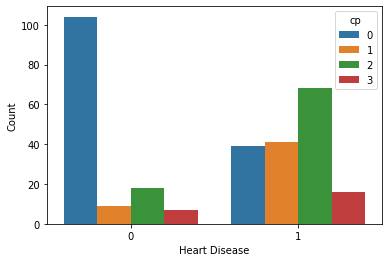

In [ ]:
sns.countplot('target',hue='cp',data=data)
plt.xlabel('Heart Disease')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

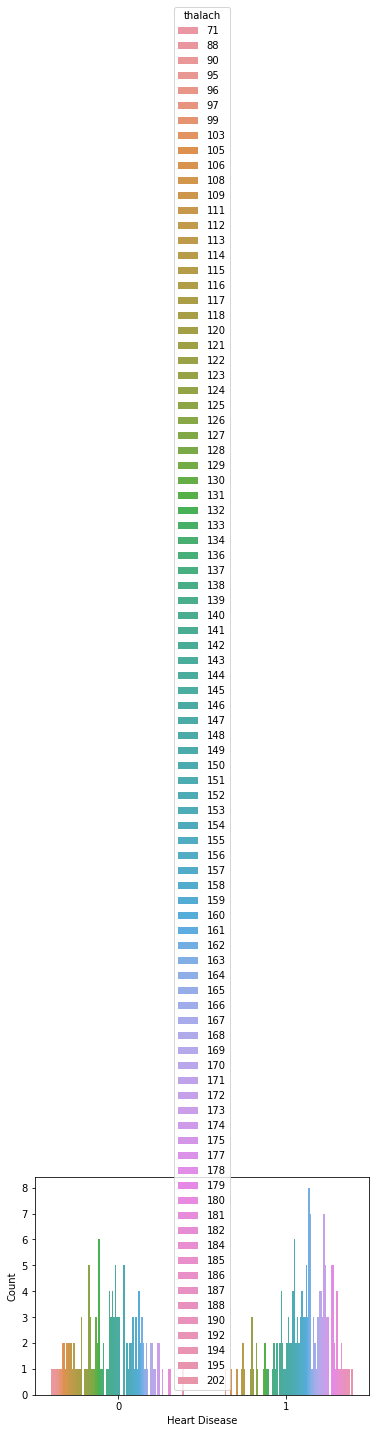

In [ ]:
sns.countplot('target',hue='thalach',data=data)
plt.xlabel('Heart Disease')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

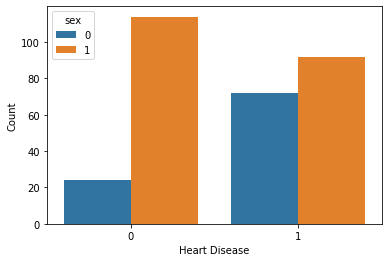

In [ ]:
sns.countplot('target',hue='sex',data=data)
plt.xlabel('Heart Disease')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

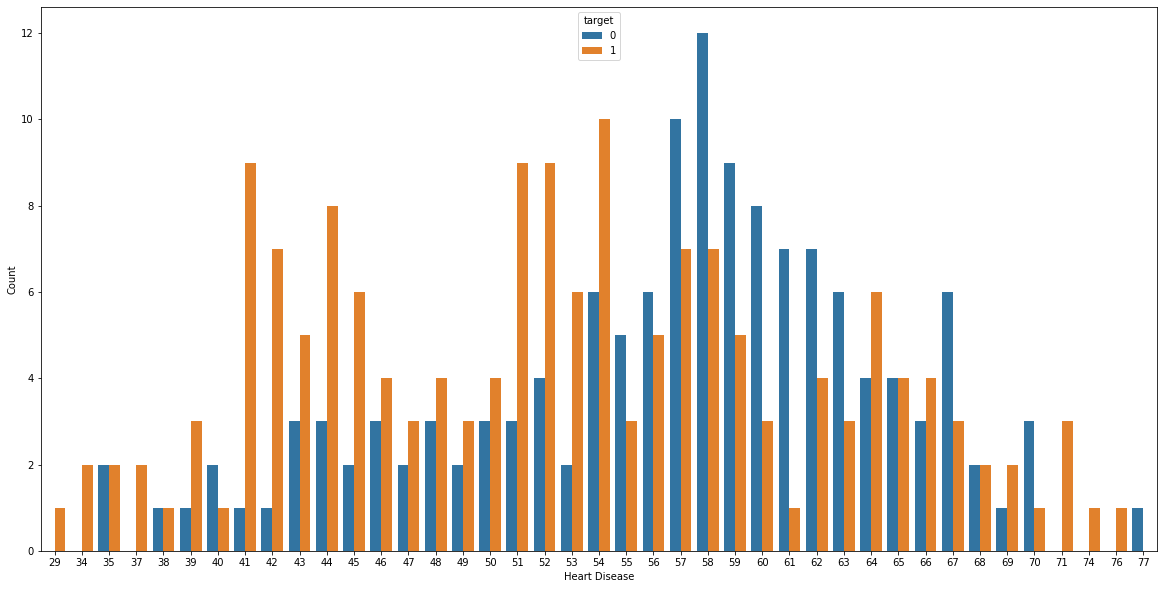

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot('age',hue='target',data=data)
plt.xlabel('Heart Disease')
plt.ylabel('Count')

## Under/Over Sampling Check:

In [ ]:
#lets check how the data is being sampled in the target like its undersampled or oversampled.
data['target'].value_counts()
#seems data is almost balanced so need to worry about under or over sampling

1    164
0    138
Name: target, dtype: int64

##Checking Outliers using Box plot

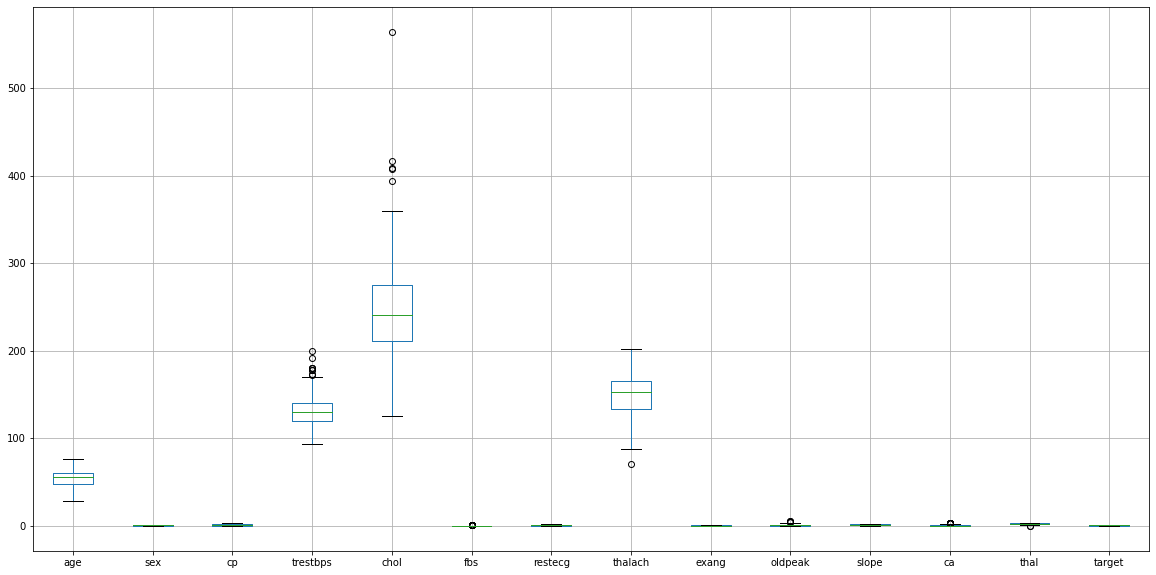

In [ ]:
plt.figure(figsize=(20,10))
data.boxplot()

##Model Building:

In [ ]:
x =data.drop(columns='target')
y= data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
def model_fit(model, X_train, X_test, y_train, y_test):
  model.fit(X_train,y_train)
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)
  train_accuracy = accuracy_score(y_train, train_pred)
  test_accuracy = accuracy_score(y_test, test_pred)
  print('')
  print(model)
  print("Train_Accuracy :",train_accuracy)
  print("Test_Accuracy :",test_accuracy)
  return train_accuracy,test_accuracy


In [ ]:
train_accuracy_lst=[]
test_accuracy_lst=[]
run_models =[LogisticRegression(penalty='none'), LogisticRegression(C=1, penalty='l1', solver='liblinear'), LogisticRegression(penalty='l2'),LogisticRegression(C=1,penalty='elasticnet',solver='saga',l1_ratio= 0.5),
            KNeighborsClassifier(n_neighbors=5), SVC(),DecisionTreeClassifier(),RandomForestClassifier(bootstrap=False),AdaBoostClassifier(),GradientBoostingClassifier()]

model_names =['LogisticRegression','lasso','Ridge', 'Elasticnet', 'KNN Calssifier',
         'SupportVectorCalssifier', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostCalssifier','GradientBootClassifier']

In [ ]:
for model in run_models:
  train_accuracy, test_accuracy= model_fit(model,X_train,X_test,y_train,y_test)
  train_accuracy_lst.append(train_accuracy)
  test_accuracy_lst.append(test_accuracy)


LogisticRegression(penalty='none')
Train_Accuracy : 0.8672199170124482
Test_Accuracy : 0.8688524590163934

LogisticRegression(C=1, penalty='l1', solver='liblinear')
Train_Accuracy : 0.8672199170124482
Test_Accuracy : 0.8360655737704918

LogisticRegression()
Train_Accuracy : 0.8755186721991701
Test_Accuracy : 0.8524590163934426

LogisticRegression(C=1, l1_ratio=0.5, penalty='elasticnet', solver='saga')
Train_Accuracy : 0.7053941908713693
Test_Accuracy : 0.7213114754098361

KNeighborsClassifier()
Train_Accuracy : 0.7593360995850622
Test_Accuracy : 0.6557377049180327

SVC()
Train_Accuracy : 0.6514522821576764
Test_Accuracy : 0.7049180327868853

DecisionTreeClassifier()
Train_Accuracy : 1.0
Test_Accuracy : 0.7868852459016393

RandomForestClassifier(bootstrap=False)
Train_Accuracy : 1.0
Test_Accuracy : 0.8688524590163934

AdaBoostClassifier()
Train_Accuracy : 0.9087136929460581
Test_Accuracy : 0.7868852459016393

GradientBoostingClassifier()
Train_Accuracy : 0.995850622406639
Test_Accuracy

In [ ]:
df = pd.DataFrame(list(zip(model_names,train_accuracy_lst,test_accuracy_lst)),columns=['model_names','TrainAccuracyScore','TestAccuracyScore'])
df

,model_names,TrainAccuracyScore,TestAccuracyScore
0,LogisticRegression,0.867220,0.868852
1,lasso,0.867220,0.836066
2,Ridge,0.875519,0.852459
3,Elasticnet,0.705394,0.721311
4,KNN Calssifier,0.759336,0.655738
5,SupportVectorCalssifier,0.651452,0.704918
6,DecisionTreeClassifier,1.000000,0.786885
7,RandomForestClassifier,1.000000,0.868852
8,AdaBoostCalssifier,0.908714,0.786885
9,GradientBootClassifier,0.995851,0.852459


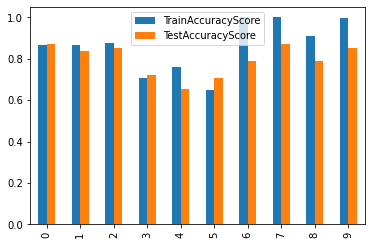

In [ ]:
df.plot(kind='bar')

##**Hyper Parameter Tuning:**

When i say hyper parameter tuning for Logistic Regression what all parameters that we can tune lets lists down

- C

####Manual way of doing the tuning for C Parameter:

In [ ]:
c = [1000,100,10,5,4,3,2,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.001,0.0001]

In [ ]:
train_accuracy_lst=[]
test_accuracy_lst=[]

for i in c:
  model = LogisticRegression(penalty='l2',C=i)
  train_accuracy, test_accuracy= model_fit(model,X_train,X_test,y_train,y_test)
  train_accuracy_lst.append(train_accuracy)
  test_accuracy_lst.append(test_accuracy)


LogisticRegression(C=1000)
Train_Accuracy : 0.8589211618257261
Test_Accuracy : 0.8688524590163934

LogisticRegression(C=100)
Train_Accuracy : 0.8630705394190872
Test_Accuracy : 0.8524590163934426

LogisticRegression(C=10)
Train_Accuracy : 0.8589211618257261
Test_Accuracy : 0.8688524590163934

LogisticRegression(C=5)
Train_Accuracy : 0.8630705394190872
Test_Accuracy : 0.8688524590163934

LogisticRegression(C=4)
Train_Accuracy : 0.8713692946058091
Test_Accuracy : 0.8524590163934426

LogisticRegression(C=3)
Train_Accuracy : 0.8547717842323651
Test_Accuracy : 0.8688524590163934

LogisticRegression(C=2)
Train_Accuracy : 0.8630705394190872
Test_Accuracy : 0.8688524590163934

LogisticRegression(C=1)
Train_Accuracy : 0.8755186721991701
Test_Accuracy : 0.8524590163934426

LogisticRegression(C=0.9)
Train_Accuracy : 0.8755186721991701
Test_Accuracy : 0.8524590163934426

LogisticRegression(C=0.8)
Train_Accuracy : 0.8713692946058091
Test_Accuracy : 0.8524590163934426

LogisticRegression(C=0.7)
Tra

In [ ]:
df = pd.DataFrame(list(zip(c,train_accuracy_lst,test_accuracy_lst)),columns=['C_Param_Value','TrainAccuracyScore','TestAccuracyScore'])
df

,C_Param_Value,TrainAccuracyScore,TestAccuracyScore
0,1000.0000,0.858921,0.868852
1,100.0000,0.863071,0.852459
2,10.0000,0.858921,0.868852
3,5.0000,0.863071,0.868852
4,4.0000,0.871369,0.852459
5,3.0000,0.854772,0.868852
6,2.0000,0.863071,0.868852
7,1.0000,0.875519,0.852459
8,0.9000,0.875519,0.852459
9,0.8000,0.871369,0.852459


###**Efficient Way of tuning the parameters using GridSearchCV:**

GridSearchCV  will do an exhaustive search over specified prameter values for an extimator:

####**Tuning Logistic Regression Model:**

In [ ]:
model_grid = LogisticRegression()

In [ ]:
parameters={'C':np.arange(0.1,10,0.1),
            'solver':['newton-cg','sag','lbfgs']}

In [ ]:
#Not only like above default values we can also pass a range of values like below
np.arange(0.1,10,0.1)
# And you can pass this range as the parameter as well

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [ ]:
grid= GridSearchCV(model_grid,parameters, scoring ='accuracy',cv =10)
#if you mention CV it will do a cross validation for k folds here k=10 folds
#It will take train data and create 10 bins/buckets and then put 0.1 as the C value and run 10 experiment ,then 0.2 next 10 experiments and so on..
# For each of the C value it will experiment 10 different combination of train and test data by creating 10 bins/buckets.And gives the result.

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'solver': ['newton-cg', 'sag', 'lbfgs']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'C': 4.7, 'solver': 'lbfgs'}

In [ ]:
grid.best_score_

0.8548333333333332

In [ ]:
grid.best_estimator_

LogisticRegression(C=4.7)

In [ ]:
grid.best_estimator_.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
accuracy_score(y_test,grid.best_estimator_.predict(X_test))

0.8524590163934426

####**Tuning Random Forest Algorithm:**

In [ ]:
model_grid = RandomForestClassifier()

In [ ]:
np.arange(10,1000,10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])

In [ ]:

parameters={'n_estimators':np.arange(350,450,10), 'max_depth':[1,2,3,4], 'max_features':[None,'auto','log2']}

Here verbose =3 will print the internal result whats happenning and all like its a log.

In [ ]:
#grid= GridSearchCV(model_grid,parameters, scoring ='accuracy',cv =3,n_jobs= -1, verbose =5)
grid= RandomizedSearchCV(model_grid,parameters, scoring ='accuracy',cv =3,n_jobs= -1, verbose =5)
#if you mention CV it will do a cross validation for k folds here k=10 folds
#It will take train data and create 10 bins/buckets and then put 0.1 as the C value and run 10 experiment ,then 0.2 next 10 experiments and so on..
# For each of the C value it will experiment 10 different combination of train and test data by creating 10 bins/buckets.And gives the result.

In [ ]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4],
                                        'max_features': [None, 'auto', 'log2'],
                                        'n_estimators': array([350, 360, 370, 380, 390, 400, 410, 420, 430, 440])},
                   scoring='accuracy', verbose=5)

In [ ]:
grid.best_params_

{'n_estimators': 350, 'max_features': 'log2', 'max_depth': 1}

In [ ]:
grid.best_score_

0.8338991769547325

In [ ]:

grid.best_estimator_

RandomForestClassifier(max_depth=1, max_features='log2', n_estimators=350)

In [ ]:

grid.best_estimator_.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
accuracy_score(y_test,grid.best_estimator_.predict(X_test))

0.8524590163934426

In [ ]:
grid.n_features_in_

13

**Chossing top 8 or 10 features from random forest and tuning again for better result**

In [ ]:
imp_percent= grid.best_estimator_.feature_importances_

In [ ]:
imp_features= grid.feature_names_in_

In [ ]:
df= pd.Series(imp_percent, index =imp_features).sort_values(ascending=False)

In [ ]:
df[:8]

thal       0.185144
ca         0.178351
cp         0.176943
oldpeak    0.118170
thalach    0.103971
exang      0.083178
slope      0.077682
age        0.025814
dtype: float64

In [ ]:
df[:8].index.values

array(['thal', 'ca', 'cp', 'oldpeak', 'thalach', 'exang', 'slope', 'age'],
      dtype=object)

In [ ]:
cols= df[:8].index.values

In [ ]:
X_train[cols]

,thal,ca,cp,oldpeak,thalach,exang,slope,age
132,2,0,1,0.0,162,0,2,42
203,3,0,2,1.6,150,1,1,68
197,3,2,0,0.2,163,0,1,67
75,2,0,1,1.4,161,0,1,55
177,2,0,2,0.0,158,0,2,64
...,...,...,...,...,...,...,...,...
189,3,0,0,0.0,158,0,2,41
71,3,1,2,0.0,154,1,2,51
106,2,1,3,0.1,131,0,1,69
271,2,2,3,2.6,145,0,1,61


So these are the top 8 features that we have lets now tune the model by passing only these 8

In [ ]:
grid.fit(X_train[cols],y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_features': [None, 'auto', 'log2'],
                         'n_estimators': array([350, 360, 370, 380, 390, 400, 410, 420, 430, 440])},
             scoring='accuracy', verbose=5)

In [ ]:
grid.best_params_

{'max_depth': 1, 'max_features': 'auto', 'n_estimators': 380}

In [ ]:

grid.best_score_

0.8381172839506172

In [ ]:

grid.best_estimator_

RandomForestClassifier(max_depth=1, n_estimators=380)

In [ ]:

grid.best_estimator_.predict(X_test[cols])

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
accuracy_score(y_test,grid.best_estimator_.predict(X_test[cols]))

0.8360655737704918

In [ ]:
grid.n_features_in_

8

In [ ]:
best_cols=['thal', 'ca', 'cp', 'oldpeak', 'thalach', 'exang', 'slope', 'age']


####**Tuning KNN Algorithm for best K value:**

In [ ]:
model_grid= KNeighborsClassifier()

In [ ]:
np.arange(350,450,10)

array([350, 360, 370, 380, 390, 400, 410, 420, 430, 440])

In [ ]:
parameters={'n_neighbors': [1,3,5,7,9,11,13,15,17,19], 'weights':['uniform','distance']}

In [ ]:
grid= GridSearchCV(model_grid,parameters, scoring ='accuracy',cv =3,n_jobs= -1, verbose =5)

In [ ]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=5)

In [ ]:
grid.best_params_

{'n_neighbors': 17, 'weights': 'uniform'}

In [ ]:
grid.best_score_

0.713477366255144

In [ ]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=17)

In [ ]:
accuracy_score(y_test,grid.best_estimator_.predict(X_test))

0.6557377049180327

####**Tuning Decision Tree Algorithm**

In [ ]:
model_grid= DecisionTreeClassifier()

In [ ]:
parameters={'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13], 'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3], 'max_features':[1,2,3,4,5,6,7,8,9,10]}

In [ ]:
grid= GridSearchCV(model_grid,parameters, scoring ='accuracy',cv =3,n_jobs= -1, verbose =5)

In [ ]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 780 candidates, totalling 2340 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3]},
             scoring='accuracy', verbose=5)

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 7,
 'min_samples_leaf': 1}

In [ ]:
grid.best_score_

0.8007716049382715

In [ ]:

grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=7)

In [ ]:
accuracy_score(y_test,grid.best_estimator_.predict(X_test))

0.7868852459016393

####Percentage of score increase after tuning is calculated as below

In [ ]:
#lets say with out tuning we got 73 and after tuning we got 78 then base is 73 and %increase after tuning is calculated as below
(78-73)/73*100

6.8493150684931505

###**Advantages of GridSearch and Hyperparameter tuning:**

- We can reduce the overfitting and also we can improve the performace using Hyperparameter tuning and Gridsearch

##Now with all these tuned parameters for each algorithm we can pass on to voting and Stacking

##**Voting Classifier:**

In [ ]:
clf1 = DecisionTreeClassifier(max_depth=4,max_features=10,min_samples_leaf=2)
clf2 = RandomForestClassifier(max_depth=6,max_features='sqrt',n_estimators=50)
clf3 = GradientBoostingClassifier()


In [ ]:
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

In [ ]:
eclf1.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              DecisionTreeClassifier(max_depth=4,
                                                     max_features=10,
                                                     min_samples_leaf=2)),
                             ('rf',
                              RandomForestClassifier(max_depth=6,
                                                     max_features='sqrt',
                                                     n_estimators=50)),
                             ('gnb', GradientBoostingClassifier())])

In [ ]:
train_pred = eclf1.predict(X_train)
test_pred = eclf1.predict(X_test)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print(eclf1)
print('\n')
print("Train_Accuracy :",train_accuracy)
print("Test_Accuracy :",test_accuracy)

VotingClassifier(estimators=[('lr',
                              DecisionTreeClassifier(max_depth=4,
                                                     max_features=10,
                                                     min_samples_leaf=2)),
                             ('rf',
                              RandomForestClassifier(max_depth=6,
                                                     max_features='sqrt',
                                                     n_estimators=50)),
                             ('gnb', GradientBoostingClassifier())])


Train_Accuracy : 0.975103734439834
Test_Accuracy : 0.8688524590163934


##**Stacking Classifier:**

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators=[('lr', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GradientBoostingClassifier())]

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('lr', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('gnb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print(clf)
print('\n')
print("Train_Accuracy :",train_accuracy)
print("Test_Accuracy :",test_accuracy)

StackingClassifier(estimators=[('lr', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('gnb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())


Train_Accuracy : 1.0
Test_Accuracy : 0.8688524590163934


##**Features Selection Using RandomForest Algorithm:**

In [ ]:
random = RandomForestClassifier()

In [ ]:
random.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
imp_features_lst = random.feature_importances_

In [ ]:
data_series=pd.Series(imp_features_lst*100,x.columns).sort_values(ascending=False)
pd.DataFrame(data_series, columns=['IMP_Percentage'])

,IMP_Percentage
thalach,12.664718
ca,12.596612
oldpeak,11.074155
cp,10.326347
thal,9.927734
age,9.736893
chol,8.198141
exang,7.099897
trestbps,6.846762
slope,4.758187


In [ ]:
#I can choose top ten best columns as well
pd.DataFrame(data_series, columns=['IMP_Percentage'])[:10]

,IMP_Percentage
thalach,12.664718
ca,12.596612
oldpeak,11.074155
cp,10.326347
thal,9.927734
age,9.736893
chol,8.198141
exang,7.099897
trestbps,6.846762
slope,4.758187


In [ ]:
col= data_series[:10].index

In [ ]:
x[col]

,thalach,ca,oldpeak,cp,thal,age,chol,exang,trestbps,slope
0,150,0,2.3,3,1,63,233,0,145,0
1,187,0,3.5,2,2,37,250,0,130,0
2,172,0,1.4,1,2,41,204,0,130,2
3,178,0,0.8,1,2,56,236,0,120,2
4,163,0,0.6,0,2,57,354,1,120,2
...,...,...,...,...,...,...,...,...,...,...
298,123,0,0.2,0,3,57,241,1,140,1
299,132,0,1.2,3,3,45,264,0,110,1
300,141,2,3.4,0,3,68,193,0,144,1
301,115,1,1.2,0,3,57,131,1,130,1


**Now with these top 10 imp columns fit the model and will see the result**

In [ ]:
random = RandomForestClassifier()

In [ ]:
random.fit(X_train[col],y_train)

RandomForestClassifier()

In [ ]:
train_pred = random.predict(X_train[col])
test_pred = random.predict(X_test[col])
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print(random)
print('\n')
print("Train_Accuracy :",train_accuracy)
print("Test_Accuracy :",test_accuracy)

RandomForestClassifier()


Train_Accuracy : 1.0
Test_Accuracy : 0.8524590163934426


**Great! with these top 10 important columns we are getting 100% accuracy**

But in Realtime this is not possible with real data set!